# YOLOv5 Model demo

### Install depedencies

In [1]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
     |████████████████████████████████| 1637.0 MB 2.3 MB/s eta 0:00:011    |██                              | 104.4 MB 43.5 MB/s eta 0:00:36     |███████▋                        | 392.0 MB 19.0 MB/s eta 0:01:06     |████████████████▊               | 852.9 MB 21.0 MB/s eta 0:00:38     |█████████████████████████▎      | 1296.0 MB 20.5 MB/s eta 0:00:17     |████████████████████████████████| 1637.0 MB 6.5 kB/s 
     |████████████████████████████████| 22.3 MB 21.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 23.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 16.8 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 138 kB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 149 kB 9.5 MB/s eta 0:00:01
     |████████████████████

### Install the model

In [2]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


#### Install the model's dependencies

In [3]:
!pip install -r "yolov5/requirements.txt"

     |████████████████████████████████| 11.3 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 60.5 MB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 701 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 41.6 MB 14.4 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 8.8 MB/s  eta 0:00:011
     |████████████████████████████████| 5.8 MB 24.1 MB/s eta 0:00:01
     |████████████████████████████████| 11.7 MB 18.0 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 19.5 MB/s eta 0:00:01
     |████████████████████████████████| 900 kB 24.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 20.6 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 23.6 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 7.2 MB/s  eta 0:00:01
     |████████████████████████████████| 4.9 MB 36.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 25.2 MB/s eta 0:00:01
     |███████████████████████████

In [6]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

### Load model

In [7]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Quang/.cache\torch\hub\master.zip
YOLOv5  2022-4-13 torch 1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)



  0%|          | 0.00/14.1M [00:00<?, ?B/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [8]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

### Make detections

In [9]:
img = '/Users/quangnguyen/Downloads/dog.jpeg'

In [10]:
results = model(img)
results.print()

image 1/1: 1080x1920 1 dog
Speed: 83.8ms pre-process, 316.2ms inference, 3.0ms NMS per image at shape (1, 3, 384, 640)


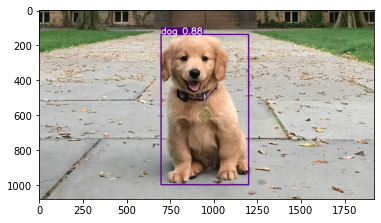

In [11]:
%matplotlib inline
mat = np.squeeze(results.render())
plt.imshow(mat)
# plt.imsave('jk.png',np.squeeze(results.render()))


In [18]:
results

## 4. Real Time Detections

In [12]:
# cap = cv2.VideoCapture(0)
# while cap.isOpened():
#     ret, frame = cap.read()
    
#     # Make detections 
#     results = model(frame)
    
#     cv2.imshow('YOLO', np.squeeze(results.render()))
    
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

## Train custom model

In [14]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./yolov5s.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /Users/quangnguyen/.cache/torch/hub/master.zip
fatal: not a git repository (or any of the parent directories): .git
YOLOv5 🚀 2022-3-20 torch 1.11.0 CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [20]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data /Users/quangnguyen/Desktop/hcl/project/datasets/dataset.yaml --weights /Users/quangnguyen/Desktop/hcl/project/yolov5s.pt

train: weights=/Users/quangnguyen/Desktop/hcl/project/yolov5s.pt, cfg=, data=/Users/quangnguyen/Desktop/hcl/project/datasets/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-51-g9cd89b7 torch 1.11.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, h